## Création d'un réseau de neurones pour faire de la reconnaissance d'images

In [1]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd
# Ohter import
import sys
from sklearn.preprocessing import StandardScaler

from PIL import Image
from skimage.color import rgb2gray
from skimage import transform

def index_max(liste):
    maxi = max(liste)
    return liste.index(maxi)

def prepare_img(img):
    '''Cette fonction sert à retailler une image et à normaliser les données de l'image'''
    img = np.array(img)

    img = 1 - transform.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
    img[0]
    img2 = np.zeros((IMAGE_SIZE,IMAGE_SIZE))
    for i in range(IMAGE_SIZE):
        for j in range(IMAGE_SIZE):
            img2[i][j] = img[i][j].mean()

    imgs = np.array(img2).reshape(-1,IMAGE_SIZE*IMAGE_SIZE)
    imgs = imgs.astype(float)
    #imgs = scaler.fit_transform(imgs)
    mean = imgs[0].mean()
    std = imgs[0].std()
    imgs[0] = (imgs[0]-mean)/std
    
    return imgs

/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

### Jeu de données

In [2]:
# Image size : 28 x 28
IMAGE_SIZE = 28

# Get only a subpart of the dataset
MAX_IMAGES = 20000

In [3]:
# Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(images, targets), (images_test, targets_test) = fashion_mnist.load_data()

images = images[:MAX_IMAGES]
targets = targets[:MAX_IMAGES]

# Convert to float
images = images.astype(float)
images_test = images_test.astype(float)

4423680/4422102 [==============================] - 0s 0us/step


images = Tableau de vecteurs de valeurs réelles (float)  
images_test = Tableau de vecteurs de valeurs réelles (float)

Ressemblant à :  

| X | X | X | 28 colonnes en tout | X |  
| X | X | X | ................................ | X |  
| X | X | X | ................................ | X |  
| 28 lignes en tout  ..........................                 |  
| X | X | X | ................................ | X |  


## Normalisation des données et aplatissement des images

In [4]:
# normalize datas
scaler = StandardScaler()
images = np.array([scaler.fit_transform(image) for image in images])
images_test = np.array([ scaler.fit_transform(image_test) for image_test in images_test])

# Reshape the dataset and convert to float
images = images.reshape(-1, IMAGE_SIZE*IMAGE_SIZE)

images_test = images_test.reshape(-1, IMAGE_SIZE*IMAGE_SIZE)

#globmean = images.mean()
#globstd = images.std()

print(images.shape)
print(targets.shape)

(20000, 784)
(20000,)


images = Vecteur de valeurs réelles (float)  
images_test = Vecteurs de valeurs réelles (float)

images = Tableau de vecteurs de valeurs réelles (float)  
images_test = Tableau de vecteurs de valeurs réelles (float)

Ressemblant à :  

| X | X | X | 28 x 28 = 784 colonnes en tout | X |

## Vérification d'une image

In [5]:
# Choix de l'image 
INDEX = 145

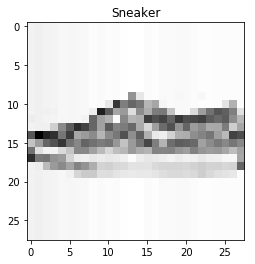

In [6]:
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
                 "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Plot one image
plt.imshow(np.reshape(images[INDEX], (IMAGE_SIZE, IMAGE_SIZE)), cmap="binary")
plt.title(targets_names[targets[INDEX]])
plt.show()

## Création du modèle

In [7]:
# model creation
model = tf.keras.models.Sequential()

### Ajout des couches de neurones

In [8]:
# Add the layers

## 1 / 3 * IMAGE_SIZE * IMAGE_SIZE
model.add(tf.keras.layers.Dense(256, activation="relu"))

## 1 / 3 * IMAGE_SIZE * IMAGE_SIZE * 1 / 2  
model.add(tf.keras.layers.Dense(128, activation="relu"))

## 10
model.add(tf.keras.layers.Dense(10, activation="softmax"))

## Exemple de prédiction sans entraînement sur une liste d'images

In [9]:
model_output = model.predict(images[0:1])
print(model_output)
print(targets[0:1])
print("Found : ", targets_names[index_max(list(model_output[0]))])
print("Should be : ", targets_names[targets[0:1][0]])

#Ici se trompe mais normal car toujours pas entraîné

Instructions for updating:
Colocations handled automatically by placer.
[[0.01823604 0.0851529  0.10975558 0.10824045 0.03330354 0.020705
  0.04232963 0.12367684 0.28795603 0.17064409]]
[9]
Found :  Bag
Should be :  Ankle boot


Par exemple :
    
[[0.0442339  0.4690514  0.03075482 0.057488   0.06961647 0.0077048
  0.212597   0.0625191  0.03022248 0.01581203]]  
[9]    
Found :  Trouser  
Should be :  Ankle boot
   
signifie :
* 46,9 % (0.4690514) de chance qu'il s'agisse du targets_names[1] (Trouser)
* 9 signifie que cela devrait être targets_names[9] (Ankle boot)

## Résumé du modèle (couches de neurones)

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  200960    
_________________________________________________________________
dense_1 (Dense)              multiple                  32896     
_________________________________________________________________
dense_2 (Dense)              multiple                  1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


## Définition du modèle :
* fonction du calcul de l'erreur
* fonction de minimisation de l'erreur (optimisation)
* mesures de la précision

In [11]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)

## Entraînement

In [12]:
history = model.fit(images, targets, epochs=10, validation_split=0.2)

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
16000/16000 [==============================] - 4s 245us/sample - loss: 0.7875 - acc: 0.7409 - val_loss: 0.5664 - val_acc: 0.7947
Epoch 2/10
16000/16000 [==============================] - 4s 241us/sample - loss: 0.4744 - acc: 0.8357 - val_loss: 0.4923 - val_acc: 0.8232
Epoch 3/10
16000/16000 [==============================] - 4s 242us/sample - loss: 0.4113 - acc: 0.8537 - val_loss: 0.4649 - val_acc: 0.8267
Epoch 4/10
16000/16000 [==============================] - 4s 239us/sample - loss: 0.3696 - acc: 0.8665 - val_loss: 0.4499 - val_acc: 0.8355
Epoch 5/10
16000/16000 [==============================] - 4s 252us/sample - loss: 0.3376 - acc: 0.8800 - val_loss: 0.4349 - val_acc: 0.8393
Epoch 6/10
16000/16000 [==============================] - 4s 236us/sample - loss: 0.3114 - acc: 0.8892 - val_loss: 0.4456 - val_acc: 0.8360
Epoch 7/10
16000/16000 [==============================] - 4s 243us/sample - loss: 0.2879 - acc: 0.9002 - val_lo

epochs = nombre de parcours du jeu d'entraînement  
validation_split = proportion des données de validation sur le jeu d'entraînement

## Résumé de l'entraînement :
* comparaison des données d'entraînement et de validation

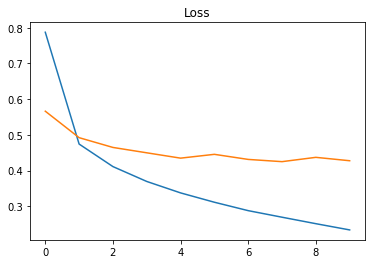

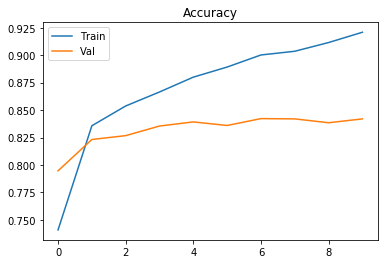

In [13]:
loss_curve = history.history["loss"]
acc_curve = history.history["acc"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_acc"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

#FONCTION DE PERTE : c'est a partir du moment ou la perte réaugmente qu'on est en sur entrainement
# SUR DE LA RECONNAISSANCE D'image, 84% de precision c'est bien

## Le modèle est-il bien entraîné ?

In [14]:
loss, acc = model.evaluate(images_test, targets_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

10000/10000 [==============================] - 1s 82us/sample - loss: 0.4229 - acc: 0.8472
Test Loss 0.42291862971782684
Test Accuracy 0.8472


## ------------------------------------------------------------

## Travail sur l'image trouvée :  
* on redimensionne
* on normalise
* on "applatit"  l'image

In [21]:
#IMAGE_PATH = 'sac.jpg'
#IMAGE_PATH = 'sac2.jpg'
#IMAGE_PATH = 'dress.jpeg'
#IMAGE_PATH = 'sandal.jpeg'
#IMAGE_PATH = 'trouser.jpeg'
#IMAGE_PATH = 'sneaker.jpeg'
#IMAGE_PATH = 'coat.jpeg'
#IMAGE_PATH = 'ankle_boot.jpeg'
IMAGE_PATH = 'Tshirt.jpeg'


In [22]:
img = Image.open(IMAGE_PATH)

imgs = prepare_img(img)
model_output = model.predict(imgs)
#ATTENTION, ici les lignes qui suivent ne traitent que le premier test effectué (la première image)
df = pd.DataFrame([ round(out,2) for out in model_output[0]]).T
df.columns = targets_names
print("Found : %s" %(targets_names[index_max(list(model_output[0]))] + '  ' + str(round(max(list(model_output[0]))*100,2)) +' %'))
df

Found : T-shirt/top  92.29 %


T-shirt/top  Trouser  Pullover  Dress  Coat  Sandal  Shirt  Sneaker  Bag  \
0         0.92      0.0       0.0    0.0   0.0     0.0   0.08      0.0  0.0   

   Ankle boot  
0         0.0

Text(0.5, 1.0, 'T-shirt/top  92.29 %')

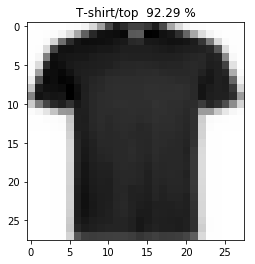

In [23]:
# Plot one image
plt.imshow(np.reshape(imgs[0], (IMAGE_SIZE, IMAGE_SIZE)), cmap="binary")
title = targets_names[index_max(list(model_output[0]))] + '  ' + str(round(max(list(model_output[0]))*100,2)) +' %'
plt.title(title)

## Trouvez des images sur internet et testez le réseau de neurones

In [47]:
#IMAGE_PATH = 'sneakers-puma-rs-x-hard-drive-gris-jaune-600x894.jpg'
#IMAGE_PATH = 'Future-Rider-Play-On-Sneakers.jpg'
IMAGE_PATH = 'verglas-hood-jacket-doudoune-homme.jpg'

Found : Coat  89.63 %


Text(0.5, 1.0, 'Coat  89.63 %')

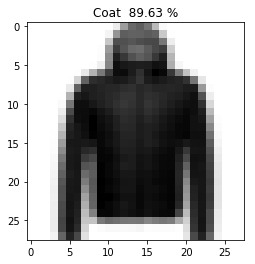

In [48]:
img = Image.open(IMAGE_PATH)

imgs = prepare_img(img)
model_output = model.predict(imgs)
#ATTENTION, ici les lignes qui suivent ne traitent que le premier test effectué (la première image)
df = pd.DataFrame([ round(out,2) for out in model_output[0]]).T
df.columns = targets_names
print("Found : %s" %(targets_names[index_max(list(model_output[0]))] + '  ' + str(round(max(list(model_output[0]))*100,2)) +' %'))
df

# Plot one image
plt.imshow(np.reshape(imgs[0], (IMAGE_SIZE, IMAGE_SIZE)), cmap="binary")
title = targets_names[index_max(list(model_output[0]))] + '  ' + str(round(max(list(model_output[0]))*100,2)) +' %'
plt.title(title)

# -----------------------------------------------------------------------

## Exercice :
### Voici une base de données de chiffres écrits à la main, créer le réseau de neurones permettant la reconnaissance de ces chiffres, testez-le sur le jeu de test, puis sur des chiffres écrits par vous-même

In [1]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd
# Ohter import
import sys
from sklearn.preprocessing import StandardScaler

from PIL import Image
from skimage.color import rgb2gray
from skimage import transform

def index_max(liste):
    maxi = max(liste)
    return liste.index(maxi)

def prepare_img(img):
    '''Cette fonction sert à retailler une image et à normaliser les données de l'image'''
    img = np.array(img)

    img = 1 - transform.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
    img[0]
    img2 = np.zeros((IMAGE_SIZE,IMAGE_SIZE))
    for i in range(IMAGE_SIZE):
        for j in range(IMAGE_SIZE):
            img2[i][j] = img[i][j].mean()

    imgs = np.array(img2).reshape(-1,IMAGE_SIZE*IMAGE_SIZE)
    imgs = imgs.astype(float)
    #imgs = scaler.fit_transform(imgs)
    mean = imgs[0].mean()
    std = imgs[0].std()
    imgs[0] = (imgs[0]-mean)/std
    
    return imgs

/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

## Jeu de données

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

5
(60000, 28, 28)
(60000,)


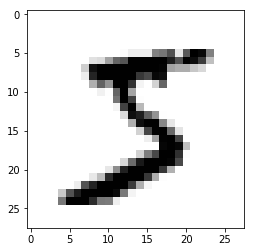

In [3]:
plt.imshow(x_train[0], cmap='binary')
print(y_train[0])
print(x_train.shape)
print(y_train.shape)


# Convert to float
x_train = x_train.astype(float)
x_test = x_test.astype(float)

### Normalisation des données

In [4]:
# Image size : 28 x 28
IMAGE_SIZE = 28

# Get only a subpart of the dataset
MAX_IMAGES = 20000

x_train = x_train[:MAX_IMAGES]
y_train = y_train[:MAX_IMAGES]

In [5]:
# normalize datas
scaler = StandardScaler()
x_train = np.array([scaler.fit_transform(x) for x in x_train])
x_test = np.array([ scaler.fit_transform(x) for x in x_test])

# Reshape the dataset and convert to float
x_train = x_train.reshape(-1, IMAGE_SIZE*IMAGE_SIZE)
x_test = x_test.reshape(-1, IMAGE_SIZE*IMAGE_SIZE)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20000, 784)
(20000,)
(10000, 784)
(10000,)


### Création/Architecture/compilation du modèle

In [6]:
# model creation
model = tf.keras.models.Sequential()

# Add the layers
## 1 / 3 * IMAGE_SIZE * IMAGE_SIZE
model.add(tf.keras.layers.Dense(256, activation="relu"))
## 1 / 3 * IMAGE_SIZE * IMAGE_SIZE * 1 / 2  
model.add(tf.keras.layers.Dense(128, activation="relu"))
## 10
model.add(tf.keras.layers.Dense(10, activation="softmax"))

# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)

Instructions for updating:
Colocations handled automatically by placer.


### Entraînement

In [7]:
print(x_train.shape)
print(y_train.shape)
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

(20000, 784)
(20000,)
Train on 16000 samples, validate on 4000 samples
Epoch 1/10
16000/16000 [==============================] - 4s 247us/sample - loss: 0.7132 - acc: 0.8010 - val_loss: 0.3698 - val_acc: 0.8963
Epoch 2/10
16000/16000 [==============================] - 4s 235us/sample - loss: 0.3027 - acc: 0.9145 - val_loss: 0.2852 - val_acc: 0.9178
Epoch 3/10
16000/16000 [==============================] - 4s 243us/sample - loss: 0.2345 - acc: 0.9335 - val_loss: 0.2390 - val_acc: 0.9323
Epoch 4/10
16000/16000 [==============================] - 4s 244us/sample - loss: 0.1935 - acc: 0.9454 - val_loss: 0.2143 - val_acc: 0.9390
Epoch 5/10
16000/16000 [==============================] - 4s 238us/sample - loss: 0.1644 - acc: 0.9546 - val_loss: 0.1965 - val_acc: 0.9433
Epoch 6/10
16000/16000 [==============================] - 4s 238us/sample - loss: 0.1416 - acc: 0.9630 - val_loss: 0.1858 - val_acc: 0.9448
Epoch 7/10
16000/16000 [==============================] - 4s 240us/sample - loss: 0.1237 

### Résumé de l'entraînement et test

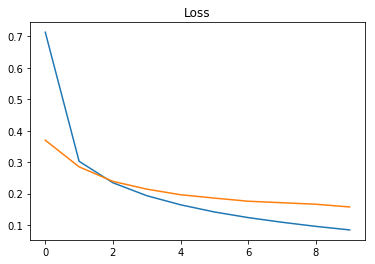

In [8]:
loss_curve = history.history["loss"]
acc_curve = history.history["acc"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_acc"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

In [9]:
#TEST

loss, acc = model.evaluate(x_test, y_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

10000/10000 [==============================] - 1s 72us/sample - loss: 0.1602 - acc: 0.9525
Test Loss 0.16023690818846226
Test Accuracy 0.9525


### TEST SUR UNE IMAGE INTERNET

In [10]:
IMG_PATH = ['0.png','2.jpg','3.png','5.png','6.png','7.png','8.png','9.png']

In [32]:
DATA = []

lab = []
for element in y_train:
    if str(element) not in labels:
        lab.append(int(element))
lab = sorted(labels)
labels = [str(value) for value in lab]

for position,IMAGE_PATH in enumerate(IMG_PATH):
    img = Image.open(IMAGE_PATH)

    imgs = prepare_img(img)
    model_output = model.predict(imgs)
    DATA.append([ round(out,2) for out in model_output[0]])
    print(len(model_output[0]))
#ATTENTION, ici les lignes qui suivent ne traitent que le premier test effectué (la première image)
#DATA = list(map(list, zip(*l)))
DATA = np.array(DATA)
print(DATA.shape)

df = pd.DataFrame(DATA,[elmt for elmt in IMG_PATH],labels)
df

#print("Found : %s" %(targets_names[index_max(list(model_output[0]))] + '  ' + str(round(max(list(model_output[0]))*100,2)) +' %'))

# Plot one image
#plt.imshow(np.reshape(imgs[0], (IMAGE_SIZE, IMAGE_SIZE)), cmap="binary")
#title = targets_names[index_max(list(model_output[0]))] + '  ' + str(round(max(list(model_output[0]))*100,2)) +' %'
#plt.title(title)

10
10
10
10
10
10
10
10
(8, 10)


0     1     2     3     4     5     6     7     8     9
0.png  0.0  0.00  0.06  0.93  0.00  0.00  0.00  0.00  0.00  0.00
2.jpg  0.0  0.00  0.98  0.00  0.00  0.01  0.00  0.00  0.00  0.00
3.png  0.0  0.00  0.01  0.39  0.00  0.53  0.00  0.04  0.00  0.03
5.png  0.0  0.00  0.00  0.20  0.00  0.09  0.00  0.60  0.00  0.11
6.png  0.0  0.00  0.00  0.05  0.00  0.95  0.00  0.00  0.00  0.00
7.png  0.0  0.65  0.00  0.00  0.28  0.00  0.06  0.00  0.00  0.00
8.png  0.0  0.00  0.00  0.01  0.00  0.99  0.00  0.00  0.00  0.00
9.png  0.0  0.00  0.14  0.36  0.11  0.35  0.02  0.00  0.02  0.00

In [ ]:
On remarque ici que les chiffres sont très mal reconnus par la modèle.